<a href="https://colab.research.google.com/github/danielarodriguez4/Proyecto-sustituto/blob/main/fase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Exploración de datos

In [ ]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [ ]:
# train columna dataframe
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [ ]:
# test columna dataframe
test['datetime'] = pd.to_datetime(test['datetime'])
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second

In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0


In [ ]:
train['weekday'] = train['datetime'].dt.day_name()
test['weekday'] = test['datetime'].dt.day_name()

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,Saturday


In [ ]:
train['season'] = train['season'].map({1:'Spring',
                                      2:'Summer',
                                      3:'Fall',
                                      4:'Winter'})
train['weather'] = train['weather'].map({1:'Clear',
                                        2:'Mist,Few Clouds',
                                        3:'Light Snow,Rain,Thunderstorm',
                                        4:'Heavy Rain, Thunderstorm, Snow, Fog'})

# Visualización de datos

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

**Mapa de distribución**

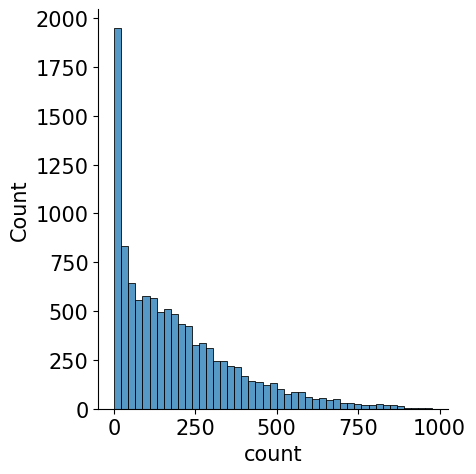

In [ ]:
mpl.rc('font',size=15)
sns.displot(train['count']);

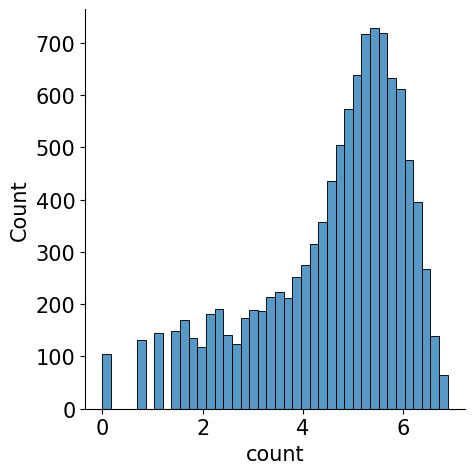

In [ ]:
sns.displot(np.log(train['count']));

**Gráfico de barras**

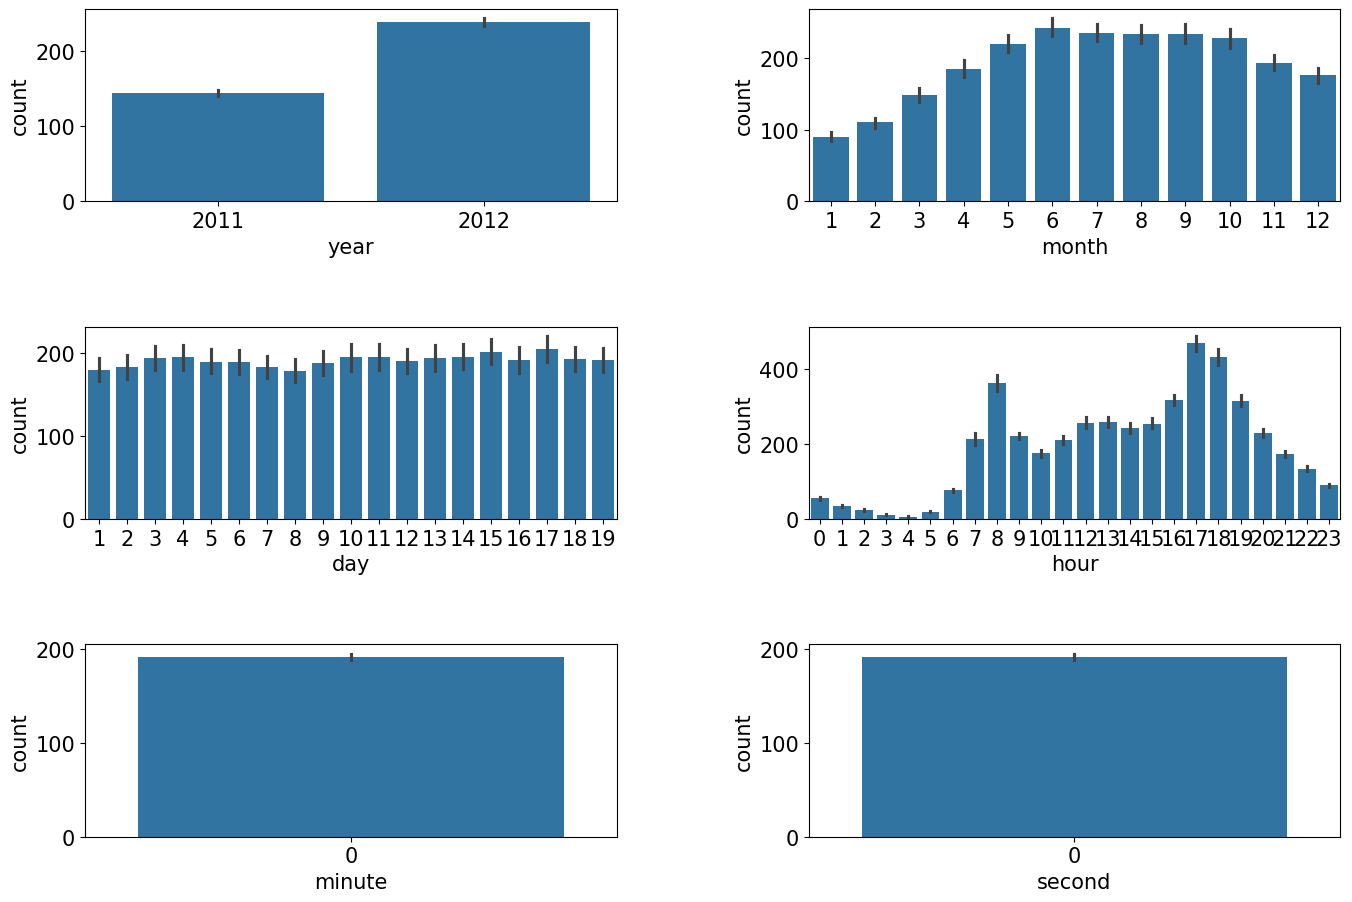

In [ ]:
fig, ax = plt.subplots(nrows=3,ncols=2)
plt.tight_layout()
fig.set_size_inches(15,10)
sns.barplot(x='year', y = 'count', data=train, ax = ax[0,0])
sns.barplot(x='month', y = 'count', data=train, ax = ax[0,1])
sns.barplot(x='day', y = 'count', data=train, ax = ax[1,0])
sns.barplot(x='hour', y = 'count', data=train, ax = ax[1,1])
sns.barplot(x='minute', y = 'count', data=train, ax = ax[2,0])
sns.barplot(x='second', y = 'count', data=train, ax = ax[2,1]);

**Diagrama de caja**

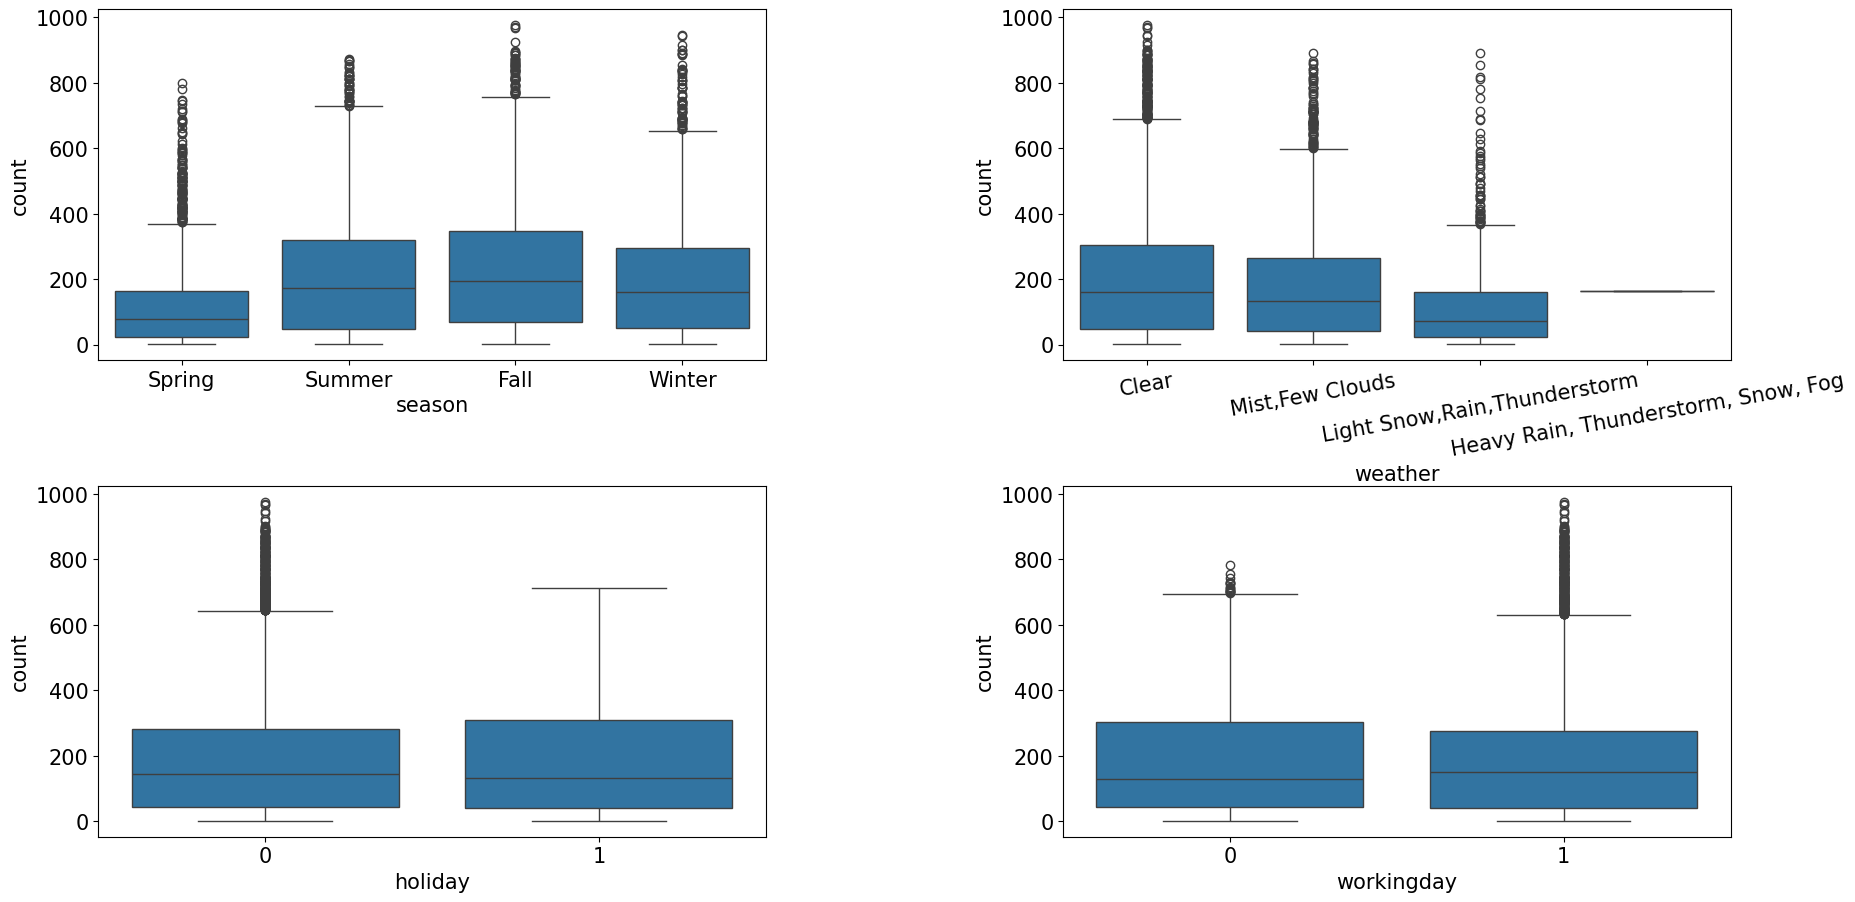

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=2)
plt.tight_layout()
fig.set_size_inches(20,10)
sns.boxplot(x='season', y='count',data=train, ax = ax[0,0])
sns.boxplot(x='weather', y='count',data=train, ax = ax[0,1])
sns.boxplot(x='holiday', y='count',data=train, ax = ax[1,0])
sns.boxplot(x='workingday', y='count',data=train, ax = ax[1,1]);

ax[0,1].tick_params(axis='x', labelrotation=10)

**Trama de puntos**

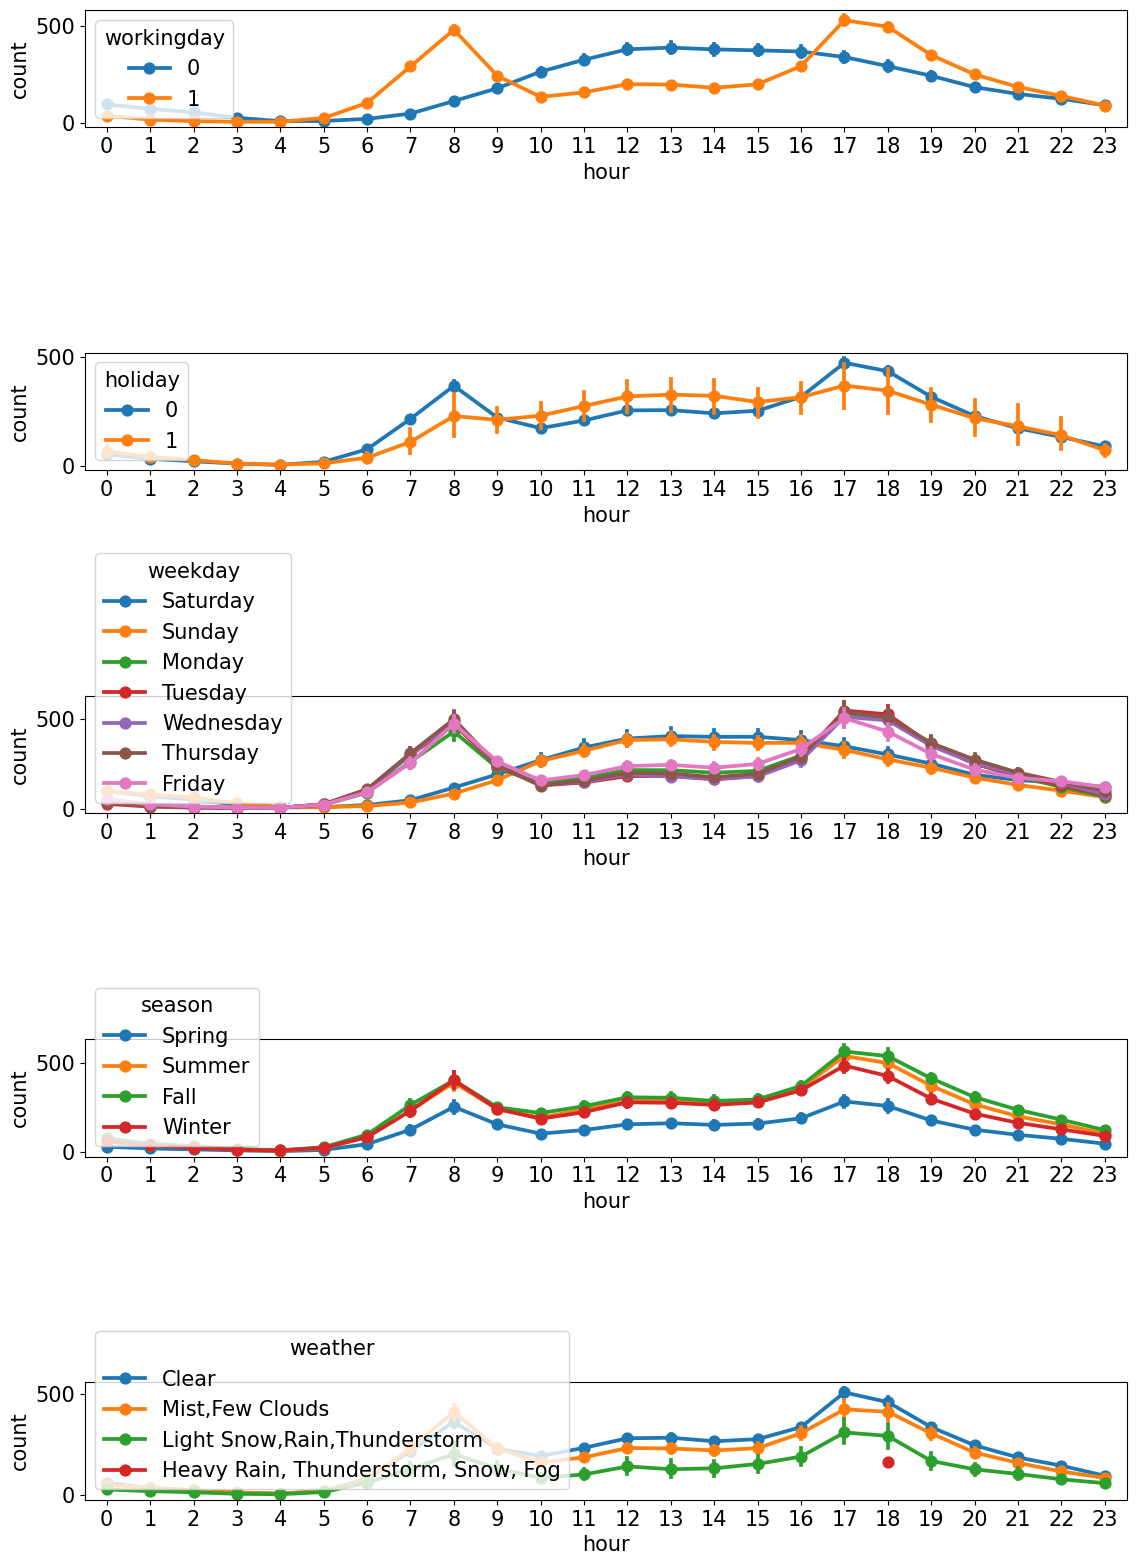

In [ ]:
fig, ax= plt.subplots(nrows=5)
plt.tight_layout()
fig.set_size_inches(12,18)

sns.pointplot(x='hour',y='count', data=train, hue='workingday', ax=ax[0])
sns.pointplot(x='hour',y='count', data=train, hue='holiday', ax=ax[1])
sns.pointplot(x='hour',y='count', data=train, hue='weekday', ax=ax[2])
sns.pointplot(x='hour',y='count', data=train, hue='season', ax=ax[3])
sns.pointplot(x='hour',y='count', data=train, hue='weather', ax=ax[4]);

**Gráfico de dispersión con línea de regresión**

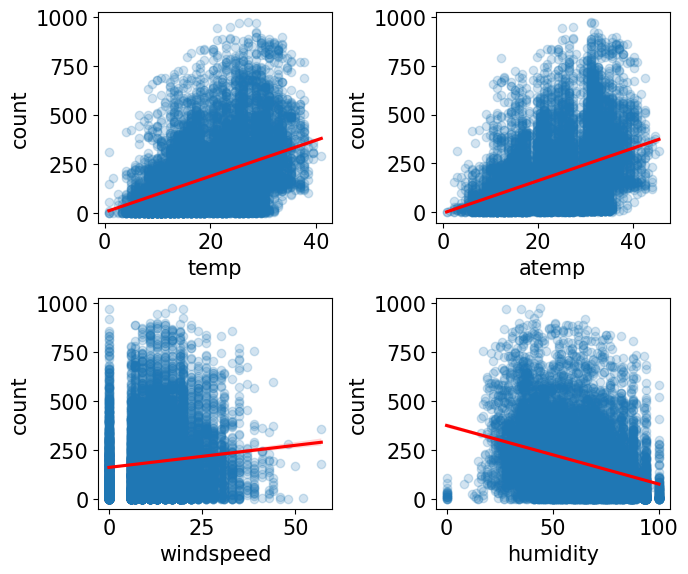

In [ ]:
fig, ax= plt.subplots(nrows=2,ncols=2)
plt.tight_layout()
fig.set_size_inches(7,6)

sns.regplot(x='temp', y='count', data=train, ax=ax[0,0],
            scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
sns.regplot(x='atemp', y='count', data=train, ax=ax[0,1],
            scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
sns.regplot(x='windspeed', y='count', data=train, ax=ax[1,0],
            scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
sns.regplot(x='humidity', y='count', data=train, ax=ax[1,1],
            scatter_kws={'alpha':0.2}, line_kws={'color':'red'});

**Mapa de calor**

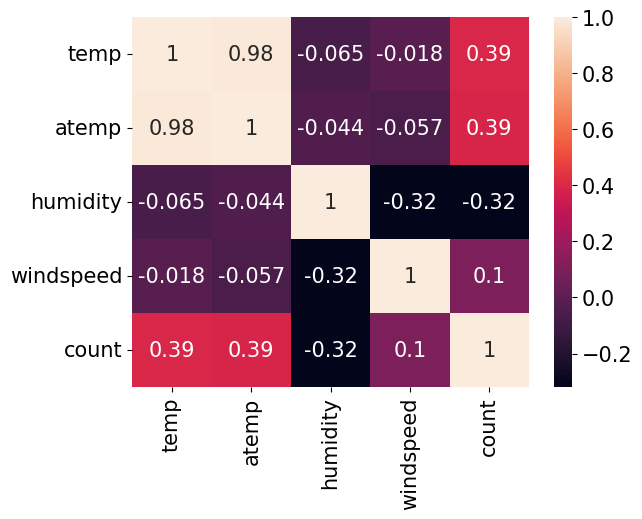

In [ ]:
corr = train[['temp','atemp','humidity','windspeed','count']].corr()
sns.heatmap(corr, annot=True);

# Preprocesamiento de datos

In [ ]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
#Eliminar valores atípicos
train = train[train['weather']!=4]

In [ ]:
# train columna dataframe
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

In [ ]:
# test columna dataframe
test['datetime'] = pd.to_datetime(test['datetime'])
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

In [ ]:
train['weekday'] = train['datetime'].dt.weekday
test['weekday'] = test['datetime'].dt.weekday

In [ ]:
train.head()
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,weekday
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3


In [ ]:
#Eliminar funciones innecesarias
train = train.drop(['casual','registered','datetime','month', 'windspeed'],axis=1)
test = test.drop(['datetime','month', 'windspeed'],axis=1)

In [ ]:
# Especificar valor objetivo
target = train.pop('count')

In [ ]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,2011,1,4,5


**Función indicadora de evaluación**

In [ ]:
from sklearn.metrics import  mean_squared_log_error

def rmsle(y_val,pred):
    return mean_squared_log_error(y_val,pred)**0.5

# Entrenamiento modelo

In [ ]:
#Regresión lineal
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
log_y=np.log(target)
lr.fit(train,log_y)
pred = lr.predict(train)

print('Valor RMSLE de regresión lineal: ',rmsle(log_y,pred))

Valor RMSLE de regresión lineal:  0.2717647817591967


In [ ]:
pred = lr.predict(test)
exp_pred = np.exp(pred) #Conversión exponencial

pd.DataFrame({'count':exp_pred}).to_csv('submission.csv',index=False)